## Import library

In [1]:
import numpy as np
import pandas as pd

from plsModelling import PLSModel

## Create Sample Data Sets

In [2]:
# Sample Data(https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_compare_cross_decomposition.html#sphx-glr-auto-examples-cross-decomposition-plot-compare-cross-decomposition-py)
n = 1000
q = 1
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5
pd.DataFrame(X, columns=[f'X{i+1}' for i in range(X.shape[1])]).head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,-0.857409,-0.105471,-0.454244,-0.947296,-0.024979,-0.839491,-1.618729,-0.758760,-0.728656,0.324625
1,-0.866538,-0.705117,0.602231,-0.266889,1.141740,2.249095,0.550531,1.007846,-0.339569,1.233291
2,-0.435855,0.195774,0.689882,-0.574148,0.439973,1.384307,0.146243,1.088140,-1.838092,-0.412032


In [3]:
pd.DataFrame(Y, columns=[f'Y{i+1}' for i in range(Y.shape[1])]).head(3)

,Y1
0,3.182015
1,1.906637
2,5.143618


In [4]:
# Save Sample datasets
X = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(X.shape[1])])
# X.to_csv('./data/x.csv', index=False)
Y = pd.DataFrame(Y, columns=[f'Y{i+1}' for i in range(Y.shape[1])])
# Y.to_csv('./data/y.csv', index=False)

In [5]:
# Read Sample datasets
X = pd.read_csv('./data/x.csv')
Y = pd.read_csv('./data/y.csv')

## Fit Model on Data

In [6]:
# Create Model
pls = PLSModel()

# Fit Predict Model
model, coefficient, result_fault_detect = pls.fit(X, Y)

Number of Component is 2


In [7]:
# Get Number of Principal Components
n_components = pls.stored_data['n_components']
n_components

2

In [8]:
# get VIP(Variable Importance in Projection)
vip = pls.calculate_vip()
vip.T
vip = pls.stored_data['vip']
vip.T

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
VIP value,1.286244,2.831122,0.202964,0.313213,0.145671,0.097703,0.030098,0.170242,0.040449,0.358798


In [9]:
# get Coefficient
coefficient = pls.calculate_coefficient()
coefficient

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Const
0,0.959707,2.010787,-0.030355,-0.068291,-0.053308,-0.088018,-0.005311,0.019364,-0.035811,-0.002354,5.054771


In [29]:
# Get pls Stored_data
pls.stored_data

{'score_t': array([[-2.11131264, -0.33035308],
        [-0.72897294,  0.25492999],
        [-0.46851121,  1.93679271],
        ...,
        [ 1.01551643, -0.96740885],
        [ 0.58299905, -0.1112064 ],
        [-0.87093917,  1.08538653]]),
 'loading_p': array([[ 0.38769711, -0.17010744],
        [ 0.89474855, -0.06525235],
        [-0.08977388, -0.35159103],
        [-0.13689766, -0.4365214 ],
        [-0.06088233, -0.12506174],
        [-0.01763104,  0.05902375],
        [-0.01325837, -0.04896838],
        [-0.07555286, -0.34160653],
        [-0.00823081,  0.00657659],
        [ 0.16038905,  0.72136322]]),
 'loading_q': array([[ 0.89942809, -0.10708639]]),
 'weight_star': array([[ 0.40896822, -0.23120669],
        [ 0.90139761, -0.16174538],
        [-0.05212824, -0.31944342],
        [-0.0841521 , -0.44628872],
        [-0.04243933, -0.15454383],
        [-0.02892223,  0.10096553],
        [-0.00787206, -0.04565794],
        [-0.0337348 , -0.35764439],
        [-0.01222484,  0.0359

## Predict

In [10]:
Y_predict = pls.predict(X)
Y_predict

array([[ 4.80867945e-01],
       [ 3.33702193e+00],
       [ 3.46804838e+00],
       [ 9.60408414e+00],
       [ 4.02218329e+00],
       [ 6.80124969e+00],
       [ 8.00203437e+00],
       [ 4.63218182e+00],
       [ 4.25109228e+00],
       [ 1.80835896e+00],
       [ 5.96828353e+00],
       [ 6.92222965e+00],
       [ 5.93677868e+00],
       [ 6.17248353e+00],
       [ 6.03161945e+00],
       [ 9.61564108e+00],
       [ 3.98872597e+00],
       [ 2.91843400e+00],
       [ 1.93030813e+00],
       [ 1.74630852e+00],
       [ 1.83157062e+00],
       [ 9.26862655e+00],
       [ 6.59202273e+00],
       [ 9.10871959e+00],
       [ 5.32776177e+00],
       [ 9.12368870e+00],
       [ 8.92493724e+00],
       [ 3.64403088e+00],
       [ 2.77869540e+00],
       [ 3.74149225e+00],
       [ 6.07511413e+00],
       [ 3.55736712e+00],
       [ 4.22783553e+00],
       [ 7.17972679e+00],
       [ 4.85429507e+00],
       [ 8.42002431e+00],
       [ 2.52323296e+00],
       [ 4.69604614e+00],
       [ 4.3

## Plot

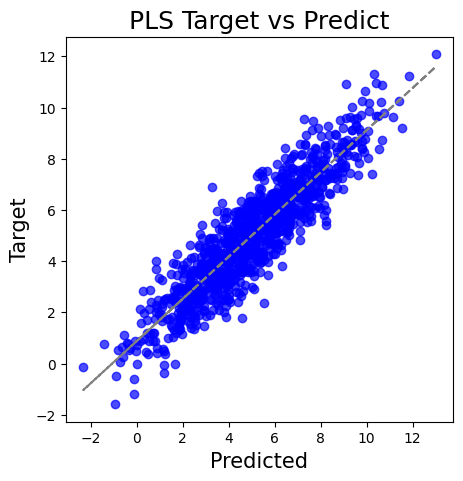

In [11]:
pls.scatterplot(fig_size=(5,5), trend_line=True)

In [12]:
z = np.polyfit(Y.values.flatten(), Y_predict.flatten(), 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화
p

poly1d([0.82441282, 0.8760407 ])

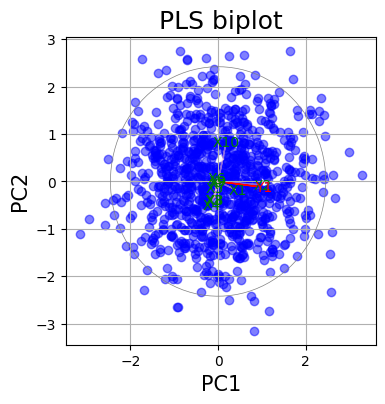

In [13]:
pls.biplot(fig_size=(4,4), opacity=0.5)

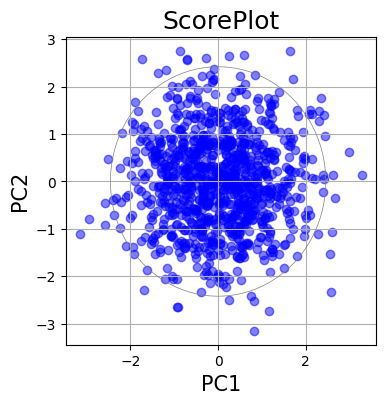

In [14]:
pls.biplot(fig_size=(4,4), plot_loading=False, title="ScorePlot", opacity=0.5)

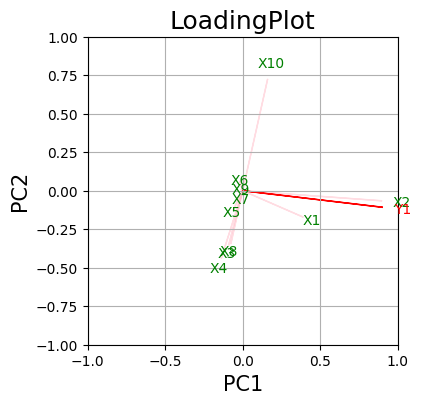

In [15]:
pls.biplot(fig_size=(4,4), plot_score=False, title="LoadingPlot")

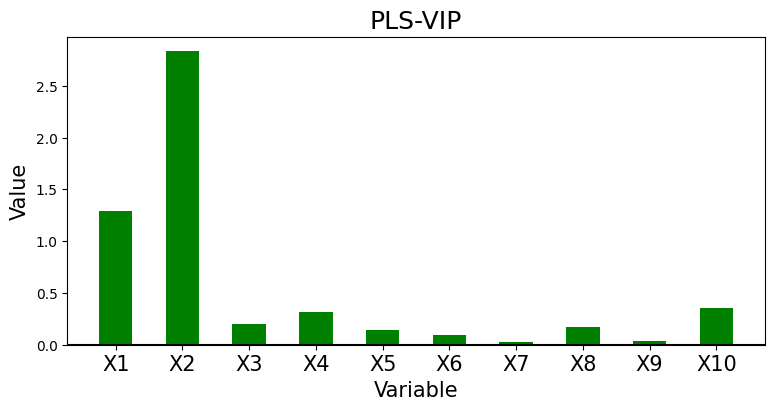

In [16]:
pls.barplot(data=vip, labels=vip.index, title="PLS-VIP")

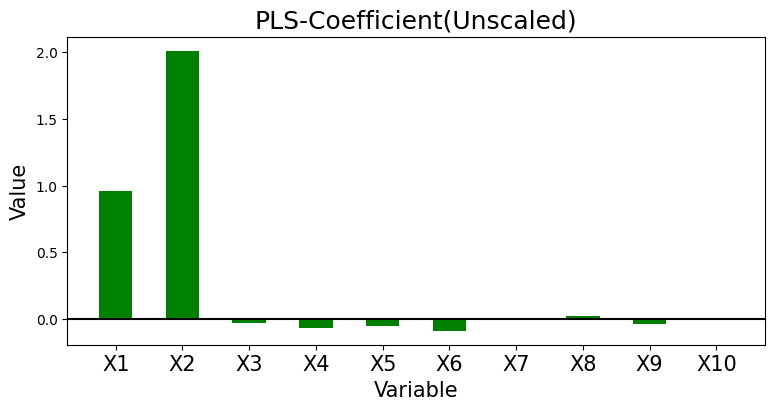

In [17]:
pls.barplot(data=coefficient.iloc[:, :-1], labels=coefficient.columns[:-1], title="PLS-Coefficient(Unscaled)")

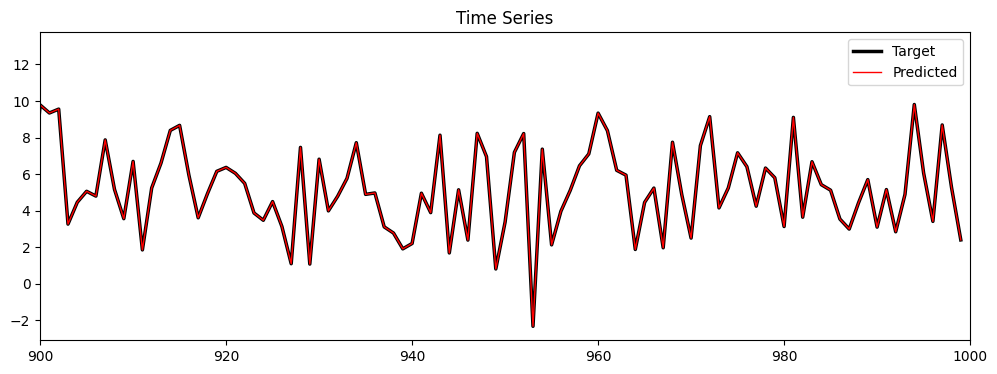

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(Y, c='k', linewidth=2.5, label='Target')
plt.plot(Y, c='r', linewidth=1, label='Predicted')
plt.xlim(len(Y)-100, len(Y))
plt.legend(loc='upper right')
plt.title("Time Series")
plt.show();

In [19]:
# Calculate R2 Score
pls.model.score(X, Y)

C:\Users\asdm1\anaconda3\envs\modellings\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.8244128176572523

## Detect Fault By PLS Score

In [20]:
# Create Model
pls = PLSModel(fault_detect=True)

# Fit Predict Model
model, _, result_fault_detect = pls.fit(X, Y)

# Anomaly Score(T2, SPE) for Train Datasets
result_fault_detect

Number of Component is 2


{'t2': {'value': array([4.55068445e+00, 5.95773052e-01, 4.06357948e+00, 7.51254584e+00,
         1.67578172e+00, 6.86300494e-01, 2.03154754e+00, 2.05365308e+00,
         1.26449580e-01, 3.41230162e+00, 7.86560565e-01, 7.89789584e-01,
         5.10248615e+00, 1.07561008e+00, 2.26207352e+00, 4.57234274e+00,
         2.10172718e-01, 8.93922401e-01, 2.30447430e+00, 2.22414024e+00,
         2.55759030e+00, 3.93121898e+00, 1.09682360e+00, 6.34376261e+00,
         6.54702895e-01, 3.93280689e+00, 4.86220014e+00, 8.03640620e+00,
         7.38806119e+00, 2.25219414e+00, 3.51139320e-01, 1.68204864e+00,
         2.34699499e+00, 1.12670258e+00, 3.08196750e-02, 2.63900303e+00,
         2.80944883e+00, 4.26000285e-02, 4.93897561e-01, 3.05429204e+00,
         1.74220121e+00, 5.32723498e-01, 1.65560742e+00, 7.42082378e-01,
         3.38557634e+00, 1.63719524e+00, 3.10466661e-01, 2.13648193e+00,
         2.08204487e+00, 4.65029101e+00, 5.31548903e+00, 4.93307755e-01,
         1.11612331e+00, 1.01976065e

### Plot Test Data on Score Plot

In [21]:
# Craete Test Data
outliers = np.array(np.random.uniform(2, 5, 1000)).reshape(100, 10)

# Make Fault
outliers[:, 7] += 10
pd.DataFrame(outliers).head(3)

,0,1,2,3,4,5,6,7,8,9
0,3.540934,3.659138,4.923700,4.396788,2.835074,3.964376,4.864587,12.015376,2.246199,3.744643
1,2.070679,2.355921,3.987510,3.374016,2.913186,3.088298,4.974673,13.212450,2.372532,3.096549
2,4.220640,4.966169,4.798899,3.907764,3.831002,3.047157,2.701925,12.841557,3.390525,2.404098


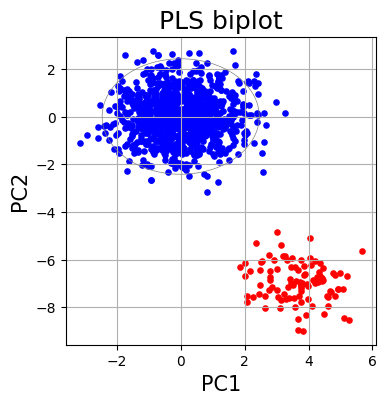

In [22]:
score_test = pls.transform(outliers)
pls.biplot(fig_size=(4,4), score_test=score_test, plot_loading=False, marker_size=14)

In [23]:
# Detect Fault
result_outliers_detect = pls.detect_fault(x=outliers)
result_outliers_detect

{'t2': {'value': array([ 64.93967653,  50.04598793,  99.24343187,  45.74129761,
          50.9321862 ,  79.16186737,  64.38004728,  66.92243356,
          62.03867759,  47.50743044,  68.21530537,  64.58840522,
          43.91191592,  48.14137969,  59.51442319,  54.98714909,
          63.00020273,  81.15131628,  39.63110384,  33.16668717,
          67.34566463,  76.06270537,  71.74778005,  66.73886388,
          61.93002195,  68.00482005,  65.23279059,  51.03012482,
          52.42919367,  64.46122667,  76.3795534 ,  63.85465869,
          55.84033259,  42.34124919,  62.57636903,  52.68789993,
          64.53483719,  66.55896076,  68.9149593 ,  66.04463612,
          63.84905388,  71.20229218,  77.74401866,  62.54270168,
          61.37459791,  63.70867489,  57.66853465,  63.25640761,
          66.66112095,  68.07201687,  90.23792575,  79.15617356,
          65.22280337,  68.87670475,  44.28151249,  59.41035754,
          69.03138681,  86.06530663,  72.64550697,  70.4288005 ,
          

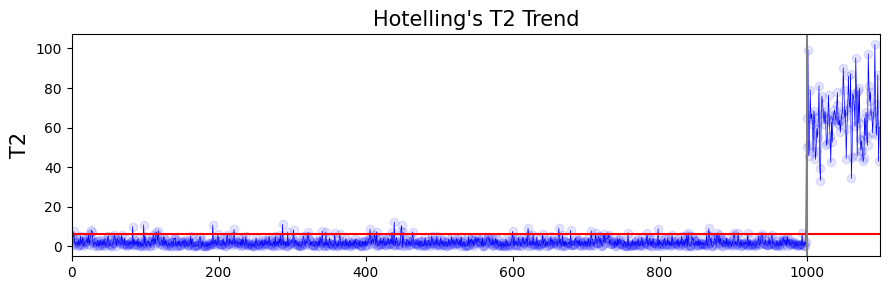

In [24]:
# Plot Hotelling's T2
t2 = result_outliers_detect['t2']['value']
pls.plot_anomaly_score(anomaly_score=t2,
                       detect_method='T2',
                       opacity=0.1, line_width=0.5, concat=True)

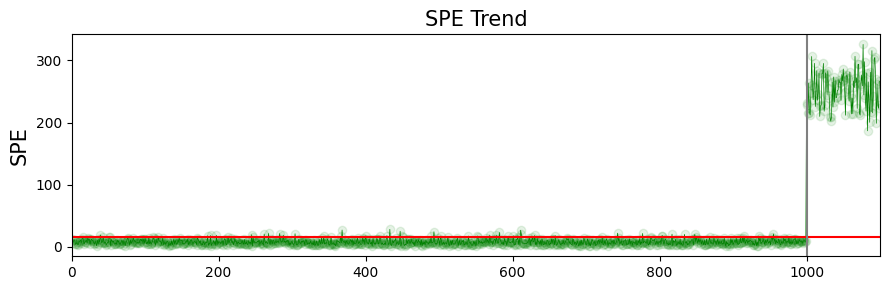

In [25]:
# Plot SPE
spe = result_outliers_detect['spe']['value']
pls.plot_anomaly_score(anomaly_score=spe,
                       detect_method='SPE', 
                       color='green',
                       opacity=0.1, line_width=0.5, concat=True)

## Identify Fault by PLS Score

In [26]:
contribution_value = pls.get_contribution(x=outliers)
contribution_value

{'X1': 3.544135672855199,
 'X2': 3.568049012814299,
 'X3': 3.462046928051401,
 'X4': 3.57398404928941,
 'X5': 3.730976995052636,
 'X6': 3.3901567591113366,
 'X7': 3.6291099978982424,
 'X8': 13.650301074592466,
 'X9': 3.4341111005271485,
 'X10': 3.3692288631505964}

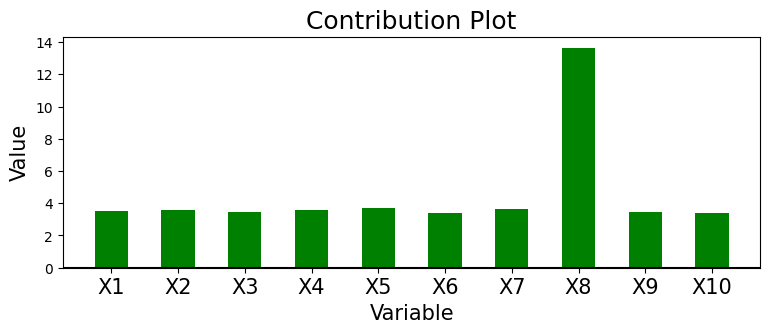

In [27]:
pls.barplot(data=contribution_value.values(), 
            labels=contribution_value.keys(),
            fig_size=(9,3))